In [41]:
# Exploratory Data Analysis for Soil Dataset

# Cell 1: Imports & Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import joblib



In [25]:
# Cell 2: Load the dataset
df = pd.read_csv('../Data/Final_data.csv')
df.head()


,Latitude,Longitude,treat,tuberY,N,P,K,ph
0,-1.92576,29.495393,NPK11,14.756944,143.0,69.0,217.0,5.9
1,-1.92576,29.495393,NPK4_MOP2,8.897569,170.0,36.0,216.0,5.9
2,-1.92576,29.495393,NPK11,22.135417,158.0,66.0,219.0,6.8
3,-1.92576,29.495393,NPK4_DAP2,14.756944,133.0,45.0,207.0,6.4
4,-1.92576,29.495393,NPK6,12.152778,132.0,48.0,218.0,6.7


In [43]:
# Cell 3: Basic information and missing values
print("Dataset Info:")
df.info()
print("\nMissing Values per Column:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   620 non-null    float64
 1   Longitude  620 non-null    float64
 2   treat      620 non-null    object 
 3   tuberY     620 non-null    float64
 4   N          620 non-null    float64
 5   P          620 non-null    float64
 6   K          620 non-null    float64
 7   ph         620 non-null    float64
dtypes: float64(7), object(1)
memory usage: 38.9+ KB

Missing Values per Column:
Latitude     0
Longitude    0
treat        0
tuberY       0
N            0
P            0
K            0
ph           0
dtype: int64


In [44]:
# Cell 4: Summary statistics
df.describe()


,Latitude,Longitude,tuberY,N,P,K,ph
count,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000
mean,-1.738381,29.443329,22.105847,135.701613,52.508065,161.401613,6.106290
std,0.174690,0.133293,14.288780,31.808083,24.673538,81.285780,0.693782
min,-2.053883,29.315699,3.038194,30.000000,10.000000,51.000000,4.500000
25%,-1.922477,29.369453,13.498590,116.000000,30.000000,89.000000,5.700000
50%,-1.717505,29.394241,20.011161,138.000000,54.000000,157.500000,6.100000
75%,-1.596826,29.478214,28.068452,160.000000,75.000000,206.000000,6.500000
max,-1.491090,29.871470,249.131944,198.000000,100.000000,369.000000,8.000000


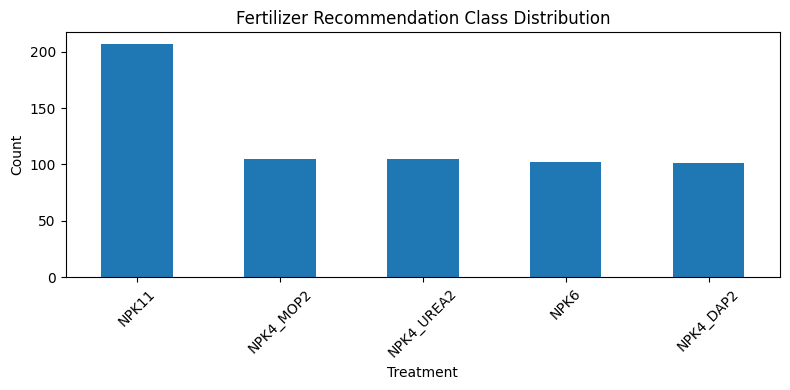

In [28]:
# Cell 5: Class distribution for 'treat'
counts = df['treat'].value_counts()
plt.figure(figsize=(8, 4))
counts.plot(kind='bar')
plt.title('Fertilizer Recommendation Class Distribution')
plt.xlabel('Treatment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


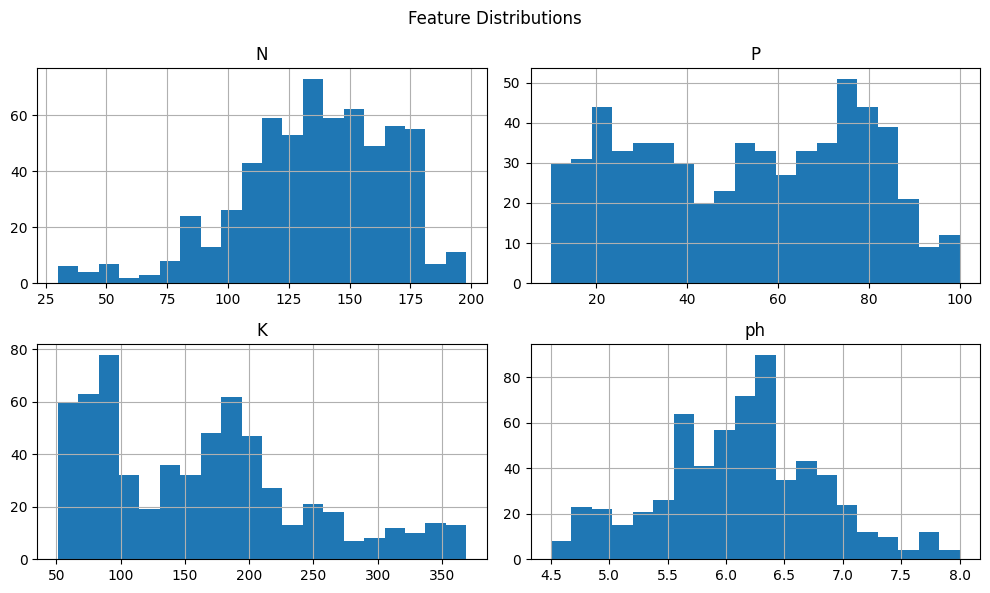

In [29]:
# Cell 6: Histograms for numeric features to inspect distribution
numeric_cols = ['N', 'P', 'K', 'ph']
df[numeric_cols].hist(bins=20, figsize=(10, 6))
plt.suptitle('Feature Distributions')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

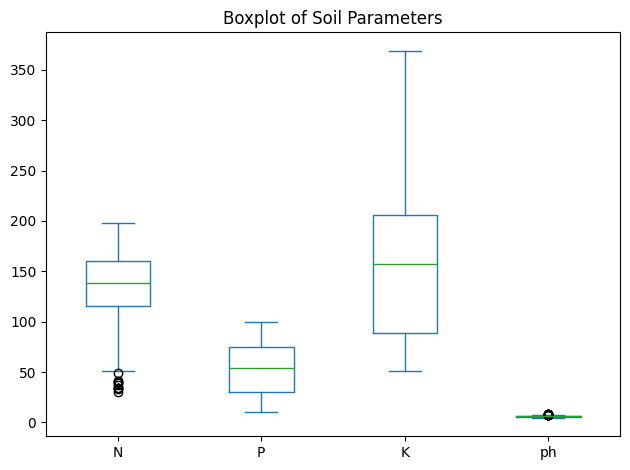

In [30]:
# Cell 7: Boxplots to detect outliers in numeric features
plt.figure(figsize=(10, 6))
df[numeric_cols].plot(kind='box')
plt.title('Boxplot of Soil Parameters')
plt.tight_layout()
plt.show()


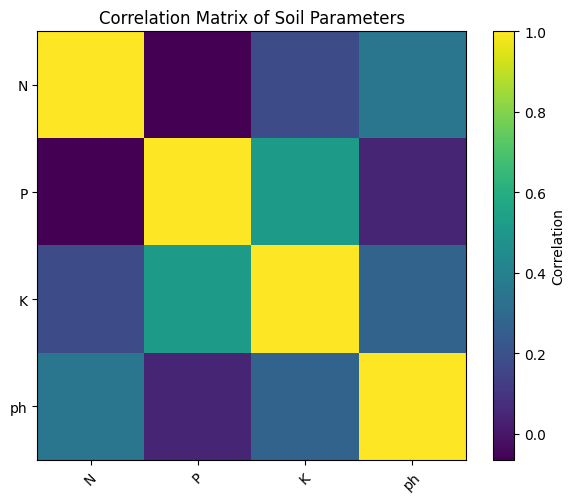

In [31]:
# Cell 8: Correlation matrix visualization
corr = df[numeric_cols].corr()
plt.figure(figsize=(6, 5))
plt.imshow(corr, cmap='viridis', interpolation='none', aspect='equal')
plt.colorbar(label='Correlation')
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title('Correlation Matrix of Soil Parameters')
plt.tight_layout()
plt.show()


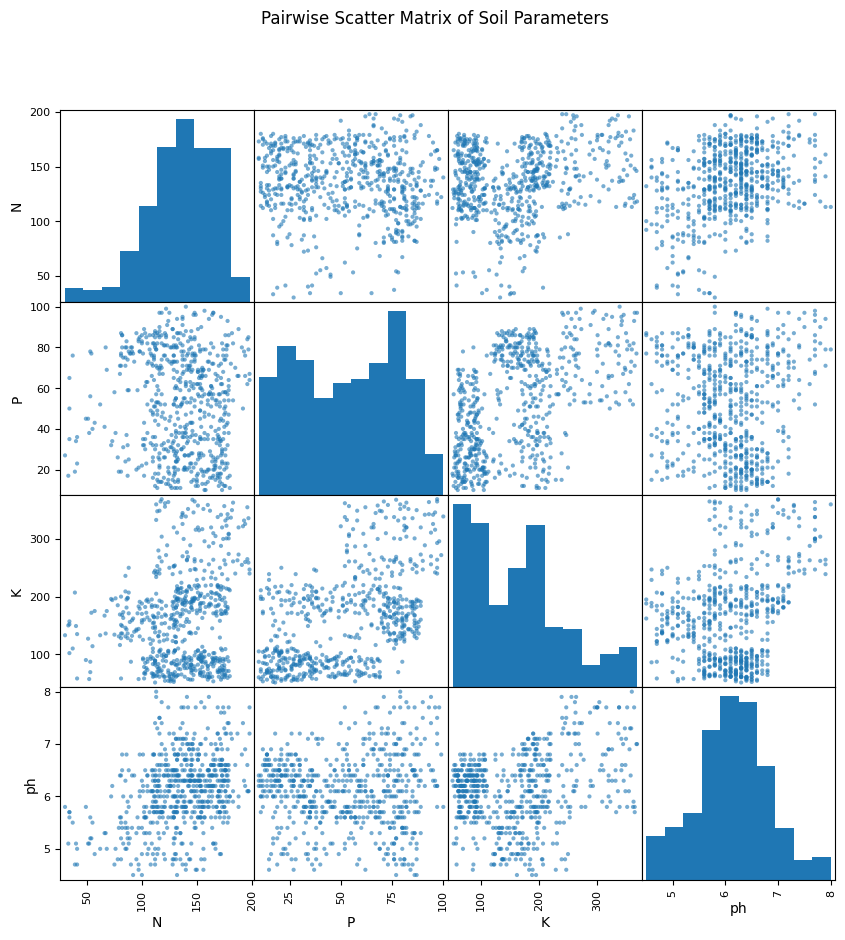

In [32]:
# Cell 9: Scatter matrix for feature relationships
scatter_matrix(df[numeric_cols], alpha=0.6, figsize=(10, 10), diagonal='hist')
plt.suptitle('Pairwise Scatter Matrix of Soil Parameters')
plt.show()


<Figure size 1000x600 with 0 Axes>

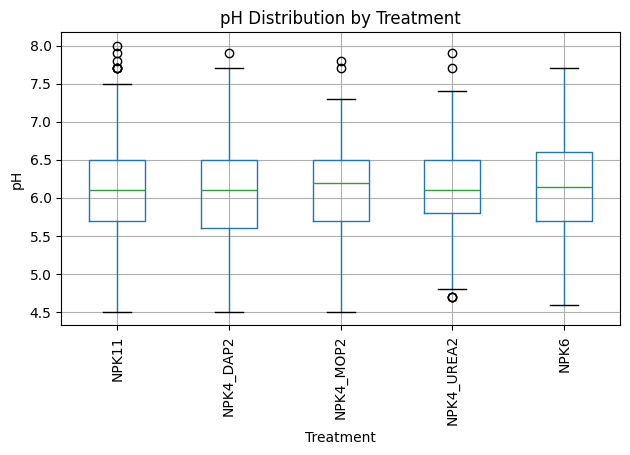

In [33]:
# Cell 10: Inspect potential class imbalance with boxplots per treatment
# Overlay boxplots of pH per treatment as an example
plt.figure(figsize=(10, 6))
df.boxplot(column='ph', by='treat', rot=90)
plt.title('pH Distribution by Treatment')
plt.suptitle('')
plt.xlabel('Treatment')
plt.ylabel('pH')
plt.tight_layout()
plt.show()


In [45]:
# Cell 3: Features / Target + Encoding + Split
X = df[['Latitude','Longitude','N','P','K','ph','tuberY']]
y = df['treat']

le = LabelEncoder()
y_enc = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc,
    stratify=y_enc,
    test_size=0.2,
    random_state=42
)


In [46]:
# Cell 4: Build Pipeline + GridSearch
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_leaf': [1, 3, 5]
}

grid = GridSearchCV(pipeline, param_grid,
                    cv=3,
                    scoring='f1_macro',
                    n_jobs=-1)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
print("Best params:", grid.best_params_)


Best params: {'clf__max_depth': 10, 'clf__min_samples_leaf': 5, 'clf__n_estimators': 200}


In [47]:
# Cell 5: Evaluation
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.3f}\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Test Accuracy: 0.153

              precision    recall  f1-score   support

       NPK11       0.31      0.33      0.32        42
   NPK4_DAP2       0.00      0.00      0.00        20
   NPK4_MOP2       0.07      0.05      0.06        21
  NPK4_UREA2       0.00      0.00      0.00        21
        NPK6       0.17      0.20      0.19        20

    accuracy                           0.15       124
   macro avg       0.11      0.12      0.11       124
weighted avg       0.14      0.15      0.15       124

